In [1]:
import pandas as pd
import numpy as np
import urllib
from bs4 import BeautifulSoup
import time
import re
# Use package tmdbsimple to extract data
import tmdbsimple as tmdb
# use "!pip install tmdbsimple" to install
tmdb.API_KEY = '302f3815bea132a8bfe0d7301c9065dd'
import random
import sys
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_tmdb = pd.read_csv('TMDb_data_25K.csv',index_col=0)
df_tmdb.head()

,poster_path,production_countries,revenue,overview,video,id,genres,title,tagline,vote_count,...,imdb_id,adult,backdrop_path,production_companies,release_date,popularity,original_title,budget,vote_average,runtime
0,/eQs5hh9rxrk1m4xHsIz1w11Ngqb.jpg,[u'United States of America'],4300000,It's Ted the Bellhop's first night on the job....,False,5,"[u'Crime', u'Comedy']",Four Rooms,Twelve outrageous guests. Four scandalous requ...,402,...,tt0113101,False,/3EqYpbGCE9S5GddU2K4cYzP5UmI.jpg,"[u'Miramax Films', u'A Band Apart']",12/25/1995,1.048212,Four Rooms,4000000,6.4,98.0
1,NaN,[u'Germany'],0,NaN,False,9,[u'Drama'],Sunday in August,NaN,1,...,tt0425473,False,NaN,[],9/2/2004,0.003213,Sonntag im August,0,1.0,15.0
2,/tvSlBzAdRE29bZe5yYWrJ2ds137.jpg,[u'United States of America'],775398007,Princess Leia is captured and held hostage by ...,False,11,"[u'Adventure', u'Action', u'Science Fiction']",Star Wars,"A long time ago in a galaxy far, far away...",5333,...,tt0076759,False,/4iJfYYoQzZcONB9hNzg0J0wWyPH.jpg,"[u'Lucasfilm', u'Twentieth Century Fox Film Co...",5/25/1977,10.412617,Star Wars,11000000,8.0,121.0
3,/zjqInUwldOBa0q07fOyohYCWxWX.jpg,[u'United States of America'],940335536,A tale which follows the comedic and eventful ...,False,12,"[u'Animation', u'Family']",Finding Nemo,"There are 3.7 trillion fish in the ocean, they...",4426,...,tt0266543,False,/n2vIGWw4ezslXjlP0VNxkp9wqwU.jpg,"[u'Walt Disney Pictures', u'Pixar Animation St...",5/30/2003,4.987594,Finding Nemo,94000000,7.5,100.0
4,/8fzjzQhLXl1afshhsE5Y3MGuco4.jpg,"[u'Germany', u'United Kingdom']",0,Ad??le and her daughter Sarah are traveling on...,False,17,"[u'Horror', u'Thriller', u'Mystery']",The Dark,One of the living for one of the dead.,61,...,tt0411267,False,/pkCC3myn5QuoLzplTlvZLB0w2AU.jpg,"[u'Constantin Film', u'Impact Pictures', u'Isl...",1/26/2006,0.347210,The Dark,0,5.5,87.0


In [3]:
df_imdb = pd.read_csv('imdb_data_25k_parse.csv')
df_imdb.head()

,Unnamed: 0,Unnamed: 0.1,title,genres,director,distributors,year,rating,votes,runtimes,...,canonical title,editorial department,canonical title.1,long imdb title,long imdb canonical title,smart canonical title,smart long imdb canonical title,full-size cover url,imdb_ids,mpaa_reason
0,0,0,Four Rooms,[u'Comedy'],"['0025978', '0734319', '0001675', '0000233']","['0051881', '0014703', '0080682', '0022594', '...",1995.0,6.7,81543.0,"[u'98', u'110::(workprint version)']",...,Four Rooms,"['0020317', '0003692', '0042901', '0120656', '...",Four Rooms,Four Rooms (1995),Four Rooms (1995),Four Rooms,Four Rooms (1995),https://images-na.ssl-images-amazon.com/images...,113101,"pervasive strong language, sexuality and some ..."
1,1,1,"Sonntag, im August",[u'Short'],['1262754'],NaN,2004.0,6.5,11.0,[u'15'],...,"Sonntag, im August",NaN,"Sonntag, im August","Sonntag, im August (2004)","Sonntag, im August (2004)","Sonntag, im August","Sonntag, im August (2004)",https://images-na.ssl-images-amazon.com/images...,425473,NaN
2,2,2,Star Wars,"[u'Action', u'Adventure', u'Fantasy', u'Sci-Fi']",['0000184'],"['0000756', '0074275', '20', '0105985', '20', ...",1977.0,8.7,969951.0,"[u'121', u'125::(special edition)']",...,Star Wars,"['0091250', '0300879', '0366165', '0385492', '...",Star Wars,Star Wars (1977),Star Wars (1977),Star Wars,Star Wars (1977),https://images-na.ssl-images-amazon.com/images...,76759,sci-fi violence and brief mild language
3,3,3,Finding Nemo,"[u'Animation', u'Adventure', u'Comedy', u'Fami...","['0004056', '0881279']","['0358618', '0064622', '0000779', '0110125', '...",2003.0,8.1,743705.0,[u'100'],...,Finding Nemo,"['0023224', '1404655', '1733701', '1404694', '...",Finding Nemo,Finding Nemo (2003),Finding Nemo (2003),Finding Nemo,Finding Nemo (2003),https://images-na.ssl-images-amazon.com/images...,266543,NaN
4,4,4,The Dark,"[u'Horror', u'Mystery', u'Thriller']",['0269502'],"['0002257', '0059064', '0022594', '0049085', '...",2005.0,5.4,9415.0,"[u'93', u'Philippines:92::(cut)']",...,"Dark, The","['1262315', '3024002', '1930271', '0996933', '...","Dark, The",The Dark (2005),"Dark, The (2005)","Dark, The","Dark, The (2005)",https://images-na.ssl-images-amazon.com/images...,411267,some violent/disturbing images and language


Based on IMDB dataset, among TMDB prediction features, 'adult', 'poster_path', 'original_title', 'video', 'id', 'homepage', 'backdrop_path' are not informative. 'production_countries', 'spoken_languages', 'production_companies', 'title' included in IMDB. One more thing to pay attention is about language, IMDB "language codes" and "languages" are the same, TMDB has 'original_language'. Should combine IMDB 'languages' + TMDB 'original_language'

In [4]:
df_imdb.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'title', u'genres', u'director',
       u'distributors', u'year', u'rating', u'votes', u'runtimes',
       u'language codes', u'languages', u'producer', u'mpaa', u'writer',
       u'top 250 rank', u'kind', u'country codes', u'countries', u'cover url',
       u'aspect_ratio', u'production companies', u'cinematographer',
       u'plot outline', u'plot', u'cast', u'animation department',
       u'original music', u'canonical title', u'editorial department',
       u'canonical title.1', u'long imdb title', u'long imdb canonical title',
       u'smart canonical title', u'smart long imdb canonical title',
       u'full-size cover url', u'imdb_ids', u'mpaa_reason'],
      dtype='object')

In [5]:
imdb_column_drop = ['Unnamed: 0', 'Unnamed: 0.1', 'cover url', 'runtimes', 'language codes', 'kind', 'country codes', 'full-size cover url', 'canonical title', 'canonical title.1', 'long imdb title', 'long imdb canonical title', 'smart canonical title', 'smart long imdb canonical title', ]
df_imdb_dropped = df_imdb.drop(imdb_column_drop, axis=1)
df_imdb_dropped.head()

,title,genres,director,distributors,year,rating,votes,languages,producer,mpaa,...,production companies,cinematographer,plot outline,plot,cast,animation department,original music,editorial department,imdb_ids,mpaa_reason
0,Four Rooms,[u'Comedy'],"['0025978', '0734319', '0001675', '0000233']","['0051881', '0014703', '0080682', '0022594', '...",1995.0,6.7,81543.0,[u'English'],"['0004744', '0375402', '0483300', '0734319', '...",R,...,"['0022594', '0019267']","['0006554', '0622897', '0005824', '0782900']",Four interlocking tales that take place in a f...,"[u""This movie features the collaborative direc...","['0205423', '0004866', '0000420', '0000187', '...","['0177478', '0005062', '0476021', '0600724', '...",['0249375'],"['0020317', '0003692', '0042901', '0120656', '...",113101,"pervasive strong language, sexuality and some ..."
1,"Sonntag, im August",[u'Short'],['1262754'],NaN,2004.0,6.5,11.0,[u'German'],['1262754'],NaN,...,NaN,['0689837'],A couple on a boat. Their love is burnt out. B...,[u'A couple on a boat. Their love is burnt out...,"['0501854', '0920574']",NaN,['1909419'],NaN,425473,NaN
2,Star Wars,"[u'Action', u'Adventure', u'Fantasy', u'Sci-Fi']",['0000184'],"['0000756', '0074275', '20', '0105985', '20', ...",1977.0,8.7,969951.0,[u'English'],"['0476030', '0000184', '0564768']",PG,...,"['0071326', '0000756']",['0852405'],Luke Skywalker joins forces with a Jedi Knight...,"[u'The Imperial Forces, under orders from crue...","['0000434', '0000148', '0000402', '0001088', '...",NaN,['0002354'],"['0091250', '0300879', '0366165', '0385492', '...",76759,sci-fi violence and brief mild language
3,Finding Nemo,"[u'Animation', u'Adventure', u'Comedy', u'Fami...","['0004056', '0881279']","['0358618', '0064622', '0000779', '0110125', '...",2003.0,8.1,743705.0,[u'English'],"['1380146', '0005124', '0910237']",NaN,...,"['0017902', '0008970']","['0129269', '0489689', '0165995']",After his son is captured in the Great Barrier...,"[u""A clown fish named Marlin lives in the Grea...","['0000983', '0001122', '1071252', '0000353', '...","['1162887', '0054659', '0065086', '0073559', '...",['0002353'],"['0023224', '1404655', '1733701', '1404694', '...",266543,NaN
4,The Dark,"[u'Horror', u'Mystery', u'Thriller']",['0269502'],"['0002257', '0059064', '0022594', '0049085', '...",2005.0,5.4,9415.0,"[u'English', u'Welsh']","['0027271', '0093337', '0160091', '0397077', '...",R,...,"['0002257', '0014411', '0112240', '0104811']",['0003791'],In mourning over the tragic drowning of their ...,"[u'While in Wales visiting her husband James, ...","['0004742', '0000293', '0747687', '1552136', '...",NaN,['0125220'],"['1262315', '3024002', '1930271', '0996933', '...",411267,some violent/disturbing images and language


In [6]:
# to drop list
tmdb_column_drop = ['adult', 'original_title', 'video', 'id', 'homepage', 'backdrop_path', 'production_companies', 'production_countries', 'spoken_languages', 'title']
df_tmdb_dropped = df_tmdb.drop(tmdb_column_drop, axis=1)

In [7]:
# rename some columns
for i in range(len(df_tmdb_dropped.columns.values)):
    df_tmdb_dropped.columns.values[i] = df_tmdb_dropped.columns.values[i] + '_TMDB'

In [8]:
df_tmdb_dropped.head()

,poster_path_TMDB,revenue_TMDB,overview_TMDB,genres_TMDB,tagline_TMDB,vote_count_TMDB,belongs_to_collection_TMDB,original_language_TMDB,status_TMDB,imdb_id_TMDB,release_date_TMDB,popularity_TMDB,budget_TMDB,vote_average_TMDB,runtime_TMDB
0,/eQs5hh9rxrk1m4xHsIz1w11Ngqb.jpg,4300000,It's Ted the Bellhop's first night on the job....,"[u'Crime', u'Comedy']",Twelve outrageous guests. Four scandalous requ...,402,0,en,Released,tt0113101,12/25/1995,1.048212,4000000,6.4,98.0
1,NaN,0,NaN,[u'Drama'],NaN,1,0,de,Released,tt0425473,9/2/2004,0.003213,0,1.0,15.0
2,/tvSlBzAdRE29bZe5yYWrJ2ds137.jpg,775398007,Princess Leia is captured and held hostage by ...,"[u'Adventure', u'Action', u'Science Fiction']","A long time ago in a galaxy far, far away...",5333,{u'backdrop_path': u'/d8duYyyC9J5T825Hg7grmaab...,en,Released,tt0076759,5/25/1977,10.412617,11000000,8.0,121.0
3,/zjqInUwldOBa0q07fOyohYCWxWX.jpg,940335536,A tale which follows the comedic and eventful ...,"[u'Animation', u'Family']","There are 3.7 trillion fish in the ocean, they...",4426,{u'backdrop_path': u'/2hC8HHRUvwRljYKIcQDMyMbL...,en,Released,tt0266543,5/30/2003,4.987594,94000000,7.5,100.0
4,/8fzjzQhLXl1afshhsE5Y3MGuco4.jpg,0,Ad??le and her daughter Sarah are traveling on...,"[u'Horror', u'Thriller', u'Mystery']",One of the living for one of the dead.,61,0,en,Released,tt0411267,1/26/2006,0.347210,0,5.5,87.0


In [9]:
columns = []
for i in range(len(df_imdb_dropped.columns.values)):
    columns += [(df_imdb_dropped.columns.values[i])]
for i in range(len(df_tmdb_dropped.columns.values)):
    columns += [(df_tmdb_dropped.columns.values[i])]

In [10]:
# create a dataframe to store information of top 500 popular movies
index = range(len(df_imdb_dropped)) 
df_merged = pd.DataFrame(index = index, columns=columns)
df_merged = df_merged.fillna(0)
df_merged.head()

,title,genres,director,distributors,year,rating,votes,languages,producer,mpaa,...,vote_count_TMDB,belongs_to_collection_TMDB,original_language_TMDB,status_TMDB,imdb_id_TMDB,release_date_TMDB,popularity_TMDB,budget_TMDB,vote_average_TMDB,runtime_TMDB
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
%%time
id_not_match_list = []
for i in range(len(df_imdb_dropped)):
    if i not in [5551, 12767, 15224, 24829]:   # these movies have trouble finding TMDB info, should remove later
        if str(df_imdb_dropped.imdb_ids[i]) in df_tmdb_dropped.imdb_id_TMDB[i]:
            for j in range(len(df_imdb_dropped.columns.values)):
                df_merged.loc[i, df_imdb_dropped.columns.values[j]] = df_imdb_dropped.loc[i, df_imdb_dropped.columns.values[j]]
            for j in range(len(df_tmdb_dropped.columns.values)):
                df_merged.loc[i, df_tmdb_dropped.columns.values[j]] = df_tmdb_dropped.loc[i, df_tmdb_dropped.columns.values[j]]
        else:
            id_not_match_list += [i]

Wall time: 16min 23s


In [12]:
print "Number of IDs not match:", len(id_not_match_list)

Number of IDs not match: 0


In [13]:
df_merged

,title,genres,director,distributors,year,rating,votes,languages,producer,mpaa,...,vote_count_TMDB,belongs_to_collection_TMDB,original_language_TMDB,status_TMDB,imdb_id_TMDB,release_date_TMDB,popularity_TMDB,budget_TMDB,vote_average_TMDB,runtime_TMDB
0,Four Rooms,[u'Comedy'],"['0025978', '0734319', '0001675', '0000233']","['0051881', '0014703', '0080682', '0022594', '...",1995.0,6.7,81543.0,[u'English'],"['0004744', '0375402', '0483300', '0734319', '...",R,...,402,0,en,Released,tt0113101,12/25/1995,1.048212,4000000,6.4,98.0
1,"Sonntag, im August",[u'Short'],['1262754'],NaN,2004.0,6.5,11.0,[u'German'],['1262754'],NaN,...,1,0,de,Released,tt0425473,9/2/2004,0.003213,0,1.0,15.0
2,Star Wars,"[u'Action', u'Adventure', u'Fantasy', u'Sci-Fi']",['0000184'],"['0000756', '0074275', '20', '0105985', '20', ...",1977.0,8.7,969951.0,[u'English'],"['0476030', '0000184', '0564768']",PG,...,5333,{u'backdrop_path': u'/d8duYyyC9J5T825Hg7grmaab...,en,Released,tt0076759,5/25/1977,10.412617,11000000,8.0,121.0
3,Finding Nemo,"[u'Animation', u'Adventure', u'Comedy', u'Fami...","['0004056', '0881279']","['0358618', '0064622', '0000779', '0110125', '...",2003.0,8.1,743705.0,[u'English'],"['1380146', '0005124', '0910237']",NaN,...,4426,{u'backdrop_path': u'/2hC8HHRUvwRljYKIcQDMyMbL...,en,Released,tt0266543,5/30/2003,4.987594,94000000,7.5,100.0
4,The Dark,"[u'Horror', u'Mystery', u'Thriller']",['0269502'],"['0002257', '0059064', '0022594', '0049085', '...",2005.0,5.4,9415.0,"[u'English', u'Welsh']","['0027271', '0093337', '0160091', '0397077', '...",R,...,61,0,en,Released,tt0411267,1/26/2006,0.347210,0,5.5,87.0
5,Metropolis,"[u'Drama', u'Sci-Fi']",['0000485'],"['0034406', '0021661', '0023400', '0103079', '...",1927.0,8.3,119193.0,[u'German'],['0690143'],NaN,...,552,0,de,Released,tt0017136,1/10/1927,1.558519,92620000,8.0,153.0
6,My Life Without Me,"[u'Drama', u'Romance']",['0170043'],"['0059453', '0004490', '0030891', '0115739', '...",2003.0,7.6,21762.0,[u'English'],"['0021948', '0000264', '0306088', '0310452', '...",R,...,63,0,en,Released,tt0314412,3/7/2003,0.457017,0,7.1,106.0
7,Pirates of the Caribbean: The Curse of the Bla...,"[u'Action', u'Adventure', u'Fantasy']",['0893659'],"['0044374', '0044279', '0038978', '0148456', '...",2003.0,8.0,853508.0,[u'English'],"['0000988', '0213226', '0376712', '0648288', '...",PG-13,...,5105,{u'backdrop_path': u'/cnKAGbX1rDkAquF2V1wVkptH...,en,Released,tt0325980,7/9/2003,14.278019,140000000,7.4,143.0
8,Kill Bill: Vol. 1,"[u'Action', u'Crime', u'Thriller']",['0000233'],"['0022594', '0054762', '0102291', '0127137', '...",2003.0,8.1,780067.0,"[u'English', u'Japanese', u'French']","['0004744', '0411070', '0535338', '2631098', '...",R,...,3712,{u'backdrop_path': u'/oCLKNACMNrEf4T1EP6BpMXDl...,en,Released,tt0266697,10/10/2003,4.933327,30000000,7.6,111.0
9,Unforgiven,"[u'Drama', u'Western']",['0000142'],"['0026840', '0048118', '0077117', '0030761', '...",1992.0,8.3,293826.0,[u'English'],"['0000142', '0525021', '0883603']",R,...,881,0,en,Released,tt0105695,8/7/1992,2.385589,14000000,7.7,131.0


In [14]:
df_merged = df_merged.drop([5551, 12767, 15224, 24829])

df_merged = df_merged.drop("imdb_id_TMDB", axis = 1)

In [15]:
df_merged

,title,genres,director,distributors,year,rating,votes,languages,producer,mpaa,...,tagline_TMDB,vote_count_TMDB,belongs_to_collection_TMDB,original_language_TMDB,status_TMDB,release_date_TMDB,popularity_TMDB,budget_TMDB,vote_average_TMDB,runtime_TMDB
0,Four Rooms,[u'Comedy'],"['0025978', '0734319', '0001675', '0000233']","['0051881', '0014703', '0080682', '0022594', '...",1995.0,6.7,81543.0,[u'English'],"['0004744', '0375402', '0483300', '0734319', '...",R,...,Twelve outrageous guests. Four scandalous requ...,402,0,en,Released,12/25/1995,1.048212,4000000,6.4,98.0
1,"Sonntag, im August",[u'Short'],['1262754'],NaN,2004.0,6.5,11.0,[u'German'],['1262754'],NaN,...,NaN,1,0,de,Released,9/2/2004,0.003213,0,1.0,15.0
2,Star Wars,"[u'Action', u'Adventure', u'Fantasy', u'Sci-Fi']",['0000184'],"['0000756', '0074275', '20', '0105985', '20', ...",1977.0,8.7,969951.0,[u'English'],"['0476030', '0000184', '0564768']",PG,...,"A long time ago in a galaxy far, far away...",5333,{u'backdrop_path': u'/d8duYyyC9J5T825Hg7grmaab...,en,Released,5/25/1977,10.412617,11000000,8.0,121.0
3,Finding Nemo,"[u'Animation', u'Adventure', u'Comedy', u'Fami...","['0004056', '0881279']","['0358618', '0064622', '0000779', '0110125', '...",2003.0,8.1,743705.0,[u'English'],"['1380146', '0005124', '0910237']",NaN,...,"There are 3.7 trillion fish in the ocean, they...",4426,{u'backdrop_path': u'/2hC8HHRUvwRljYKIcQDMyMbL...,en,Released,5/30/2003,4.987594,94000000,7.5,100.0
4,The Dark,"[u'Horror', u'Mystery', u'Thriller']",['0269502'],"['0002257', '0059064', '0022594', '0049085', '...",2005.0,5.4,9415.0,"[u'English', u'Welsh']","['0027271', '0093337', '0160091', '0397077', '...",R,...,One of the living for one of the dead.,61,0,en,Released,1/26/2006,0.347210,0,5.5,87.0
5,Metropolis,"[u'Drama', u'Sci-Fi']",['0000485'],"['0034406', '0021661', '0023400', '0103079', '...",1927.0,8.3,119193.0,[u'German'],['0690143'],NaN,...,There can be no understanding between the hand...,552,0,de,Released,1/10/1927,1.558519,92620000,8.0,153.0
6,My Life Without Me,"[u'Drama', u'Romance']",['0170043'],"['0059453', '0004490', '0030891', '0115739', '...",2003.0,7.6,21762.0,[u'English'],"['0021948', '0000264', '0306088', '0310452', '...",R,...,NaN,63,0,en,Released,3/7/2003,0.457017,0,7.1,106.0
7,Pirates of the Caribbean: The Curse of the Bla...,"[u'Action', u'Adventure', u'Fantasy']",['0893659'],"['0044374', '0044279', '0038978', '0148456', '...",2003.0,8.0,853508.0,[u'English'],"['0000988', '0213226', '0376712', '0648288', '...",PG-13,...,Prepare to be blown out of the water.,5105,{u'backdrop_path': u'/cnKAGbX1rDkAquF2V1wVkptH...,en,Released,7/9/2003,14.278019,140000000,7.4,143.0
8,Kill Bill: Vol. 1,"[u'Action', u'Crime', u'Thriller']",['0000233'],"['0022594', '0054762', '0102291', '0127137', '...",2003.0,8.1,780067.0,"[u'English', u'Japanese', u'French']","['0004744', '0411070', '0535338', '2631098', '...",R,...,Go for the kill.,3712,{u'backdrop_path': u'/oCLKNACMNrEf4T1EP6BpMXDl...,en,Released,10/10/2003,4.933327,30000000,7.6,111.0
9,Unforgiven,"[u'Drama', u'Western']",['0000142'],"['0026840', '0048118', '0077117', '0030761', '...",1992.0,8.3,293826.0,[u'English'],"['0000142', '0525021', '0883603']",R,...,Some legends will never be forgotten. Some wro...,881,0,en,Released,8/7/1992,2.385589,14000000,7.7,131.0


In [16]:
# set index to be imdb_ids
df_merged = df_merged.set_index(df_merged.imdb_ids)

In [17]:
df_merged

,title,genres,director,distributors,year,rating,votes,languages,producer,mpaa,...,tagline_TMDB,vote_count_TMDB,belongs_to_collection_TMDB,original_language_TMDB,status_TMDB,release_date_TMDB,popularity_TMDB,budget_TMDB,vote_average_TMDB,runtime_TMDB
imdb_ids,,,,,,,,,,,,,,,,,,,,,
113101,Four Rooms,[u'Comedy'],"['0025978', '0734319', '0001675', '0000233']","['0051881', '0014703', '0080682', '0022594', '...",1995.0,6.7,81543.0,[u'English'],"['0004744', '0375402', '0483300', '0734319', '...",R,...,Twelve outrageous guests. Four scandalous requ...,402,0,en,Released,12/25/1995,1.048212,4000000,6.4,98.0
425473,"Sonntag, im August",[u'Short'],['1262754'],NaN,2004.0,6.5,11.0,[u'German'],['1262754'],NaN,...,NaN,1,0,de,Released,9/2/2004,0.003213,0,1.0,15.0
76759,Star Wars,"[u'Action', u'Adventure', u'Fantasy', u'Sci-Fi']",['0000184'],"['0000756', '0074275', '20', '0105985', '20', ...",1977.0,8.7,969951.0,[u'English'],"['0476030', '0000184', '0564768']",PG,...,"A long time ago in a galaxy far, far away...",5333,{u'backdrop_path': u'/d8duYyyC9J5T825Hg7grmaab...,en,Released,5/25/1977,10.412617,11000000,8.0,121.0
266543,Finding Nemo,"[u'Animation', u'Adventure', u'Comedy', u'Fami...","['0004056', '0881279']","['0358618', '0064622', '0000779', '0110125', '...",2003.0,8.1,743705.0,[u'English'],"['1380146', '0005124', '0910237']",NaN,...,"There are 3.7 trillion fish in the ocean, they...",4426,{u'backdrop_path': u'/2hC8HHRUvwRljYKIcQDMyMbL...,en,Released,5/30/2003,4.987594,94000000,7.5,100.0
411267,The Dark,"[u'Horror', u'Mystery', u'Thriller']",['0269502'],"['0002257', '0059064', '0022594', '0049085', '...",2005.0,5.4,9415.0,"[u'English', u'Welsh']","['0027271', '0093337', '0160091', '0397077', '...",R,...,One of the living for one of the dead.,61,0,en,Released,1/26/2006,0.347210,0,5.5,87.0
17136,Metropolis,"[u'Drama', u'Sci-Fi']",['0000485'],"['0034406', '0021661', '0023400', '0103079', '...",1927.0,8.3,119193.0,[u'German'],['0690143'],NaN,...,There can be no understanding between the hand...,552,0,de,Released,1/10/1927,1.558519,92620000,8.0,153.0
314412,My Life Without Me,"[u'Drama', u'Romance']",['0170043'],"['0059453', '0004490', '0030891', '0115739', '...",2003.0,7.6,21762.0,[u'English'],"['0021948', '0000264', '0306088', '0310452', '...",R,...,NaN,63,0,en,Released,3/7/2003,0.457017,0,7.1,106.0
325980,Pirates of the Caribbean: The Curse of the Bla...,"[u'Action', u'Adventure', u'Fantasy']",['0893659'],"['0044374', '0044279', '0038978', '0148456', '...",2003.0,8.0,853508.0,[u'English'],"['0000988', '0213226', '0376712', '0648288', '...",PG-13,...,Prepare to be blown out of the water.,5105,{u'backdrop_path': u'/cnKAGbX1rDkAquF2V1wVkptH...,en,Released,7/9/2003,14.278019,140000000,7.4,143.0
266697,Kill Bill: Vol. 1,"[u'Action', u'Crime', u'Thriller']",['0000233'],"['0022594', '0054762', '0102291', '0127137', '...",2003.0,8.1,780067.0,"[u'English', u'Japanese', u'French']","['0004744', '0411070', '0535338', '2631098', '...",R,...,Go for the kill.,3712,{u'backdrop_path': u'/oCLKNACMNrEf4T1EP6BpMXDl...,en,Released,10/10/2003,4.933327,30000000,7.6,111.0


-----

### Merge genres

In [18]:
# function genre_assign
# input: genres for one movie, string type
# output: a string list, which are corresponding columns names for the genres of input movie 
def genre_assign(genre_temp):
    columns_list = ['Action', 'Adventure', 'Comedy', 'Crime', 'Fantasy', 'Family', 'Romance', 'Horror', 'Reality-TV', 'Western', 'Documentary', 'Biography', 'News', 'Film-Noir', 'Drama', 'Animation', 'Sci-Fi', 'Thriller', 'Short', 'Mystery', 'Sport', 'War', 'History', 'Game-Show', 'Music', 'Musical', 'Talk-Show', 'Foreign', 'TV movie']
    genre_list = []
    for i in columns_list:
        if i in genre_temp:
            genre_list += [i]
    if "Sci-Fi" not in genre_list:
        if "Science Fiction" in genre_temp:
            genre_list += ['Sci-Fi']
    return genre_list

In [19]:
# create a dataframe to store genres
columns = ['imdb_ids', 'Action', 'Adventure', 'Comedy', 'Crime', 'Fantasy', 'Family', 'Romance', 'Horror', 'Reality-TV', 'Western', 'Documentary', 'Biography', 'News', 'Film-Noir', 'Drama', 'Animation', 'Sci-Fi', 'Thriller', 'Short', 'Mystery', 'Sport', 'War', 'History', 'Game-Show', 'Music', 'Musical', 'Talk-Show', 'Foreign', 'TV movie']
index = range(len(df_imdb))
df_merged_y = pd.DataFrame(index = index, columns=columns)
df_merged_y = df_merged_y.fillna(0)

In [20]:
for i in range(len(df_imdb)):
    if i not in [5551, 12767, 15224, 24829]:   # these movies have trouble finding TMDB info, should remove later
        genre_temp = str(df_tmdb.loc[i, "genres"]) + str(df_imdb.loc[i, "genres"])
        column_list_temp = genre_assign(genre_temp)
        for column in column_list_temp:
            df_merged_y.loc[i, column] = 1
        df_merged_y.loc[i, 'imdb_ids'] = df_imdb.loc[i, "imdb_ids"]
df_merged_y = df_merged_y.drop([5551, 12767, 15224, 24829])



In [21]:
mismatch_total = 0
for i in range(len(df_merged_y.imdb_ids.values)):
    if df_merged.imdb_ids.values[i] - df_merged_y.imdb_ids.values[i] != 0:
        mismatch_total += 1

In [22]:
df_merged_y = df_merged_y.set_index(df_merged_y.imdb_ids)

------

### download poster

In [133]:
import urllib
path_poster = "http://image.tmdb.org/t/p/w500/{}"
path_poster_local = '{}.jpg'

for i in range(10):
    extend_path = df_merged.poster_path_TMDB.values[i]
    if len(str(extend_path)) > 4:
        urllib.urlretrieve(path_poster.format(extend_path), path_poster_local.format(df_merged.poster_path_TMDB.index[i]))

### correlation matrix

In [23]:
df_corr = df_merged_y.drop(['imdb_ids'], axis = 1).corr()

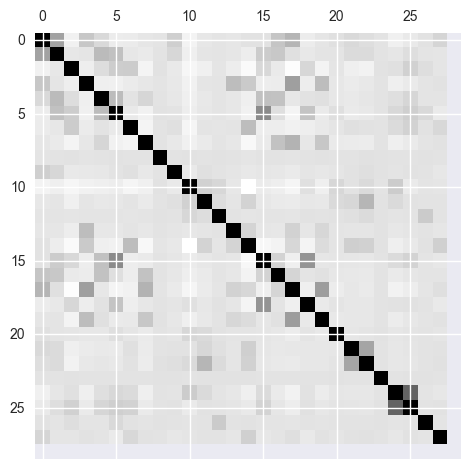

In [24]:
plt.matshow(df_corr)

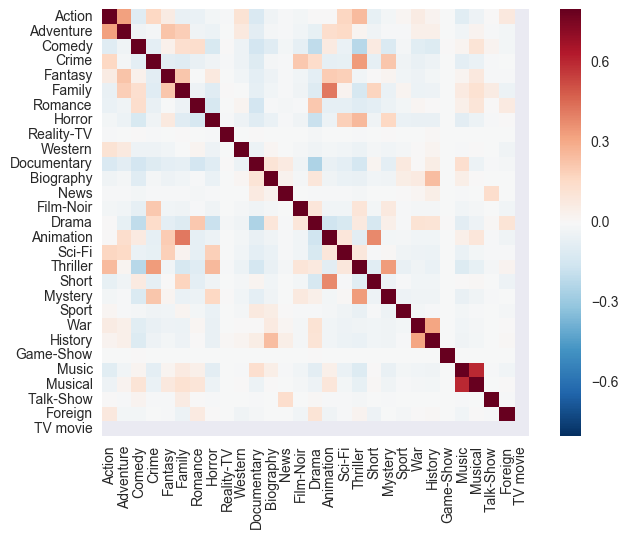

In [25]:
sns.heatmap(df_corr, vmax=.8, square=True)


### write out data

In [26]:
df_merged_y = df_merged_y.drop(["imdb_ids"], axis = 1)
df_merged = df_merged.drop(["imdb_ids", 'poster_path_TMDB'], axis = 1)

In [27]:
df_merged.columns

Index([u'title', u'genres', u'director', u'distributors', u'year', u'rating',
       u'votes', u'languages', u'producer', u'mpaa', u'writer',
       u'top 250 rank', u'countries', u'aspect_ratio', u'production companies',
       u'cinematographer', u'plot outline', u'plot', u'cast',
       u'animation department', u'original music', u'editorial department',
       u'mpaa_reason', u'revenue_TMDB', u'overview_TMDB', u'genres_TMDB',
       u'tagline_TMDB', u'vote_count_TMDB', u'belongs_to_collection_TMDB',
       u'original_language_TMDB', u'status_TMDB', u'release_date_TMDB',
       u'popularity_TMDB', u'budget_TMDB', u'vote_average_TMDB',
       u'runtime_TMDB'],
      dtype='object')

In [28]:
# write the dataframe out
df_merged.to_csv(('feature_final.csv'))
df_merged_y.to_csv('genre_final.csv')

IOError: [Errno 13] Permission denied: 'genre_final.csv'

---------------